## Analise de Remuneração Liquida de Postos do Poder Executivo Federal

#### Importando Bibliotecas

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Inicio da Analise

In [151]:
df = pd.read_csv('5233-liquidosexoraca.csv', sep = ';')
df.head()

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"


In [152]:
# Retirando a primeira coluna
df = df[['ano', 'sexo_raça', 'liquido']]
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


In [153]:
# Explorando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        88 non-null     int64 
 1   sexo_raça  88 non-null     object
 2   liquido    88 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [154]:
# Tirando as virgulas e colocando pontos para reconhecer dado como numerico
df['liquido'] = df['liquido'].str.replace(',','.').astype(float)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        88 non-null     int64  
 1   sexo_raça  88 non-null     object 
 2   liquido    88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


#### Agrupando dados por Cor e Genero
* Obsevando por Média de Rendimento

In [156]:
### Agrupando informações
remun_cor_genero = df.groupby(['sexo_raça'])['liquido'].mean().reset_index()
remun_cor_genero['liquido'] = round(remun_cor_genero['liquido'],2) 
remun_cor_genero


,sexo_raça,liquido
0,Homem Branco,7738.23
1,Homem Negro,5460.00
2,Mulher Branca,6718.90
3,Mulher Negra,5066.83


[Text(0, 1, 'R$ 7.738,23'),
 Text(0, 1, 'R$ 5.460'),
 Text(0, 1, 'R$ 6.718,90'),
 Text(0, 1, 'R$ 5.066,83')]

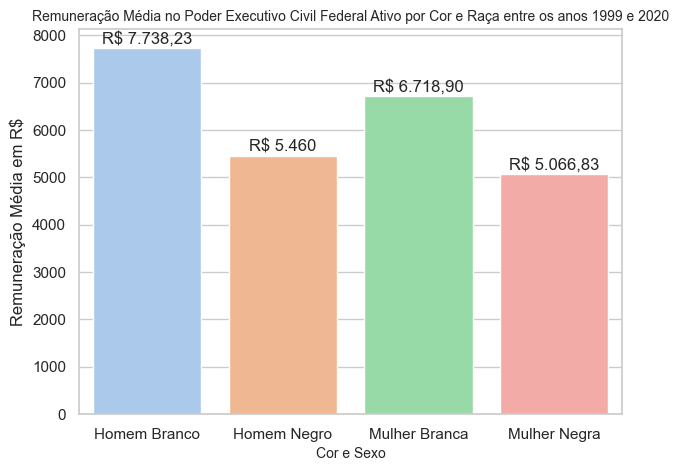

In [157]:
## Produzindo o gráfico
f, ax1 = plt.subplots(figsize=(7, 5))
ax1 = sns.barplot(data = remun_cor_genero ,x= 'sexo_raça', y='liquido', palette="pastel")
plt.xlabel('Cor e Sexo', size = 10)
plt.ylabel('Remuneração Média em R$')
plt.title('Remuneração Média no Poder Executivo Civil Federal Ativo por Cor e Raça entre os anos 1999 e 2020', size = 10)
ax1.bar_label(ax1.containers[0], label_type='edge', padding=1, labels = ["R$ 7.738,23", "R$ 5.460", 'R$ 6.718,90', 'R$ 5.066,83'])




#### Elaborando analise de comparativo de Rendimentos cor e sexo pela Média de Remuneração

In [158]:
# Observando a média anual
media_anual = df.groupby(['ano'])['liquido'].mean().reset_index()
media_anual['liquido'] = round(media_anual['liquido'],2) 
media_anual.head()

,ano,liquido
0,1999,5141.88
1,2000,4627.95
2,2001,4668.25
3,2002,5099.00
4,2003,4864.82


In [159]:
# Jutando a a média anual a base original
df_com_media_anual = df.merge(media_anual, left_on='ano', right_on='ano')
df_com_media_anual.rename(columns={'liquido_y': 'media_do_ano',
'liquido_x' : 'media_por_rs'}, inplace=True)
df_com_media_anual.head()

,ano,sexo_raça,media_por_rs,media_do_ano
0,1999,Homem Branco,6527.2,5141.88
1,1999,Homem Negro,4768.7,5141.88
2,1999,Mulher Branca,5261.6,5141.88
3,1999,Mulher Negra,4010.0,5141.88
4,2000,Homem Branco,5690.3,4627.95


In [160]:
# Criando coluna de Valor Comparativo
df_com_media_anual['compa_percent'] = round(df_com_media_anual['media_por_rs'] / df_com_media_anual['media_do_ano'] - 1,2)*100
df_com_media_anual.head()

,ano,sexo_raça,media_por_rs,media_do_ano,compa_percent
0,1999,Homem Branco,6527.2,5141.88,27.0
1,1999,Homem Negro,4768.7,5141.88,-7.0
2,1999,Mulher Branca,5261.6,5141.88,2.0
3,1999,Mulher Negra,4010.0,5141.88,-22.0
4,2000,Homem Branco,5690.3,4627.95,23.0


In [230]:
# Porcentagem salarial de Mulheres em comparativo com o salário médio do ano
mulheres = df_com_media_anual.query("sexo_raça == ('Mulher Negra', 'Mulher Branca')")
mulheres['compa_percent'].mean()

-5.863636363636363

In [220]:
# Olhando para a taxa média de diferença salarial de mulheres negras para com a média
mulher_negra = df_com_media_anual.query("sexo_raça == 'Mulher Negra'")
mulher_negra['compa_percent'].mean()

-19.045454545454547

In [221]:
# Olhando para a taxa média de diferença salarial de mulheres brancas para com a média
mulher_branca = df_com_media_anual.query("sexo_raça == 'Mulher Branca'")
mulher_branca['compa_percent'].mean()

7.318181818181818

In [222]:
homem_branco = df_com_media_anual.query("sexo_raça == 'Homem Branco'")
homem_branco['compa_percent'].mean()


24.272727272727273

In [223]:
homem_negro = df_com_media_anual.query("sexo_raça == 'Homem Negro'")
homem_negro['compa_percent'].mean()

-12.318181818181818

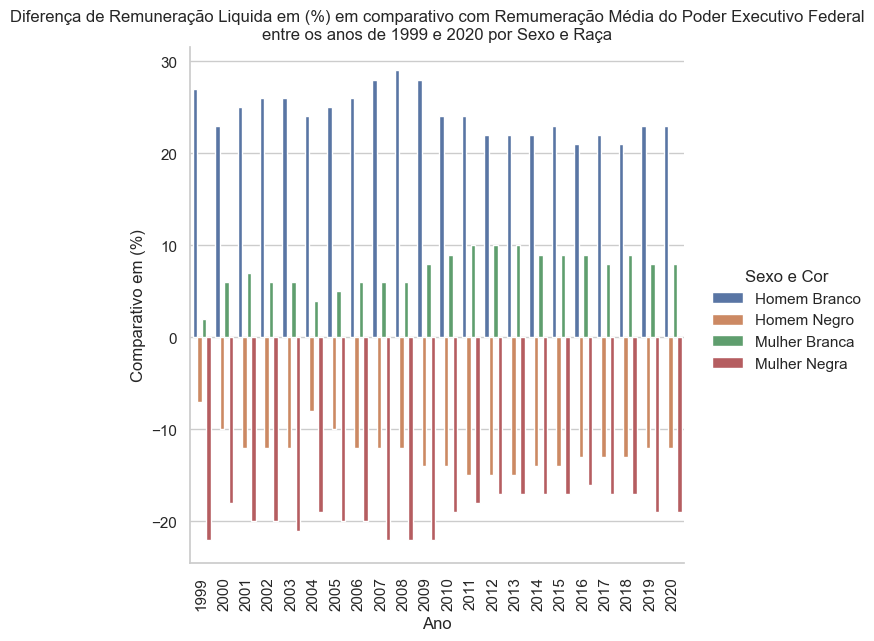

In [161]:
g1 = sns.catplot(data=df_com_media_anual, kind="bar",x="ano", y="compa_percent", hue="sexo_raça", alpha=1, height=6)
plt.xticks(rotation = 90)
plt.xlabel('Ano')
plt.ylabel('Comparativo em (%)')
plt.title('Diferença de Remuneração Liquida em (%) em comparativo com Remumeração Média do Poder Executivo Federal\nentre os anos de 1999 e 2020 por Sexo e Raça',
size = 12)
g1._legend.set_title('Sexo e Cor')


#### Analisando segunda base para comparativo - Base com total de Vinculos por Cor e Gênero

In [177]:
# Olhando para a base de total de vinculos ativos por cor e sexo
df_vinculos = pd.read_csv('base_2.csv', sep = ';', encoding= 'utf8')
df_vinculos.head()

,ano,raça,Fem,Mas,total,total_ano,fem_ano,mas_ano
0,1999,AMARELA,7319,8566,15885,477416,210314,267102
1,1999,BRANCA,105793,124198,229991,477416,210314,267102
2,1999,INDIGENA,530,1054,1584,477416,210314,267102
3,1999,NAO INFORMADO,32792,50004,82796,477416,210314,267102
4,1999,PARDA,54612,74169,128781,477416,210314,267102


In [178]:
df_vinculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        132 non-null    int64 
 1   raça       132 non-null    object
 2   Fem        132 non-null    int64 
 3   Mas        132 non-null    int64 
 4   total      132 non-null    int64 
 5   total_ano  132 non-null    int64 
 6   fem_ano    132 non-null    int64 
 7   mas_ano    132 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.4+ KB


In [179]:
# Olhando para a diferança de Vinculos ativos de mulheres e homens
dif_sexo = df_vinculos.groupby(['ano'])[['fem_ano', 'mas_ano']].mean().reset_index().rename(columns = {'fem_ano': 'feminino', 'mas_ano': 'masculino'})
dif_sexo.head()


,ano,feminino,masculino
0,1999,210314.0,267102.0
1,2000,203748.0,259080.0
2,2001,198272.0,248091.0
3,2002,192609.0,227055.0
4,2003,192290.0,226842.0


In [180]:
# criando a coluna de comparativo salarial de Homens para Mulheres
dif_sexo['comparativo'] = round(dif_sexo['masculino'] / dif_sexo['feminino'] - 1,2)*100 # Criando o percentual de diferença de pessoal, sem contar sexo
dif_sexo.head()

,ano,feminino,masculino,comparativo
0,1999,210314.0,267102.0,27.0
1,2000,203748.0,259080.0,27.0
2,2001,198272.0,248091.0,25.0
3,2002,192609.0,227055.0,18.0
4,2003,192290.0,226842.0,18.0


###### Criando plot do comparativo

Text(16.819444444444443, 0.5, '(%) Comparativa')

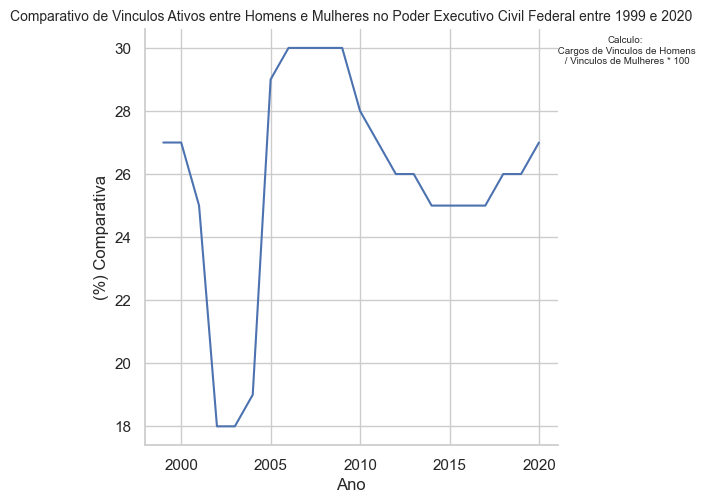

In [211]:
sns.set_theme(style="whitegrid")
sns.relplot(
    data=dif_sexo,
    x="ano", y="comparativo",
    kind="line")
plt.title('Comparativo de Vinculos Ativos entre Homens e Mulheres no Poder Executivo Civil Federal entre 1999 e 2020', size = 10)
plt.suptitle('Calculo:\n Cargos de Vinculos de Homens\n / Vinculos de Mulheres * 100',size = 7, y = 0.95, x = 1.1)
plt.xlabel('Ano')
plt.ylabel('(%) Comparativa')



* É possivel na Analise de que homens sempre tiveram mais postos no Poder Executivo Federal, chegando a 30% entre os anos de 2006 a 2009

In [182]:
df_vinculos.head()

,ano,raça,Fem,Mas,total,total_ano,fem_ano,mas_ano
0,1999,AMARELA,7319,8566,15885,477416,210314,267102
1,1999,BRANCA,105793,124198,229991,477416,210314,267102
2,1999,INDIGENA,530,1054,1584,477416,210314,267102
3,1999,NAO INFORMADO,32792,50004,82796,477416,210314,267102
4,1999,PARDA,54612,74169,128781,477416,210314,267102


In [183]:
# Criando as porcentagens
df_vinculos['porcentagem_mulheres_cor_anual'] = round(df_vinculos['Fem'] / df_vinculos['total_ano'],2)*100
df_vinculos['porcentagem_homens_cor_anual'] = round(df_vinculos['Mas'] / df_vinculos['total_ano'],2)*100
df_vinculos['total_porcent_anual'] = df_vinculos['porcentagem_homens_cor_anual'] + df_vinculos['porcentagem_mulheres_cor_anual']
df_vinculos.head(6)

,ano,raça,Fem,Mas,total,total_ano,fem_ano,mas_ano,porcentagem_mulheres_cor_anual,porcentagem_homens_cor_anual,total_porcent_anual
0,1999,AMARELA,7319,8566,15885,477416,210314,267102,2.0,2.0,4.0
1,1999,BRANCA,105793,124198,229991,477416,210314,267102,22.0,26.0,48.0
2,1999,INDIGENA,530,1054,1584,477416,210314,267102,0.0,0.0,0.0
3,1999,NAO INFORMADO,32792,50004,82796,477416,210314,267102,7.0,10.0,17.0
4,1999,PARDA,54612,74169,128781,477416,210314,267102,11.0,16.0,27.0
5,1999,PRETA,9268,9111,18379,477416,210314,267102,2.0,2.0,4.0


In [229]:
mulheres_cargos = df_vinculos.groupby(['ano'])['fem_ano', 'total_ano'].mean().reset_index()
mulheres_cargos['porcentagem'] = mulheres_cargos['fem_ano'] / mulheres_cargos['total_ano'] *100
mulheres_cargos['porcentagem'].mean()

C:\Users\chris\AppData\Local\Temp\ipykernel_3076\2582320420.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mulheres_cargos = df_vinculos.groupby(['ano'])['fem_ano', 'total_ano'].mean().reset_index()


44.2974843740384

* Pessoas brancas em todos os anos da pesquisa mantem uma grande maioria em todos os anos, tendo aumento, chegando a mais de 50% pós os anos 2000 e atingindo picos entre os anos de 2011 e 2020
* Pardos não tem muita alteração de participação nos cargos
* Pretos tiveram um pequeno aumento em % entre os anos de 2017 e 2020
* É importante ressaltar a diminuição da expressividade de falta de dados sobre a cor dos ocupantes dos cargos, acompanhando dessa diminuição de informações de Não informados veio o aumento da % de brancos
* Indigenas sempre mantiveram inexpressiva presença no Porder Executivo

-- Essas informações podem ser visualizada no grafico abaixo

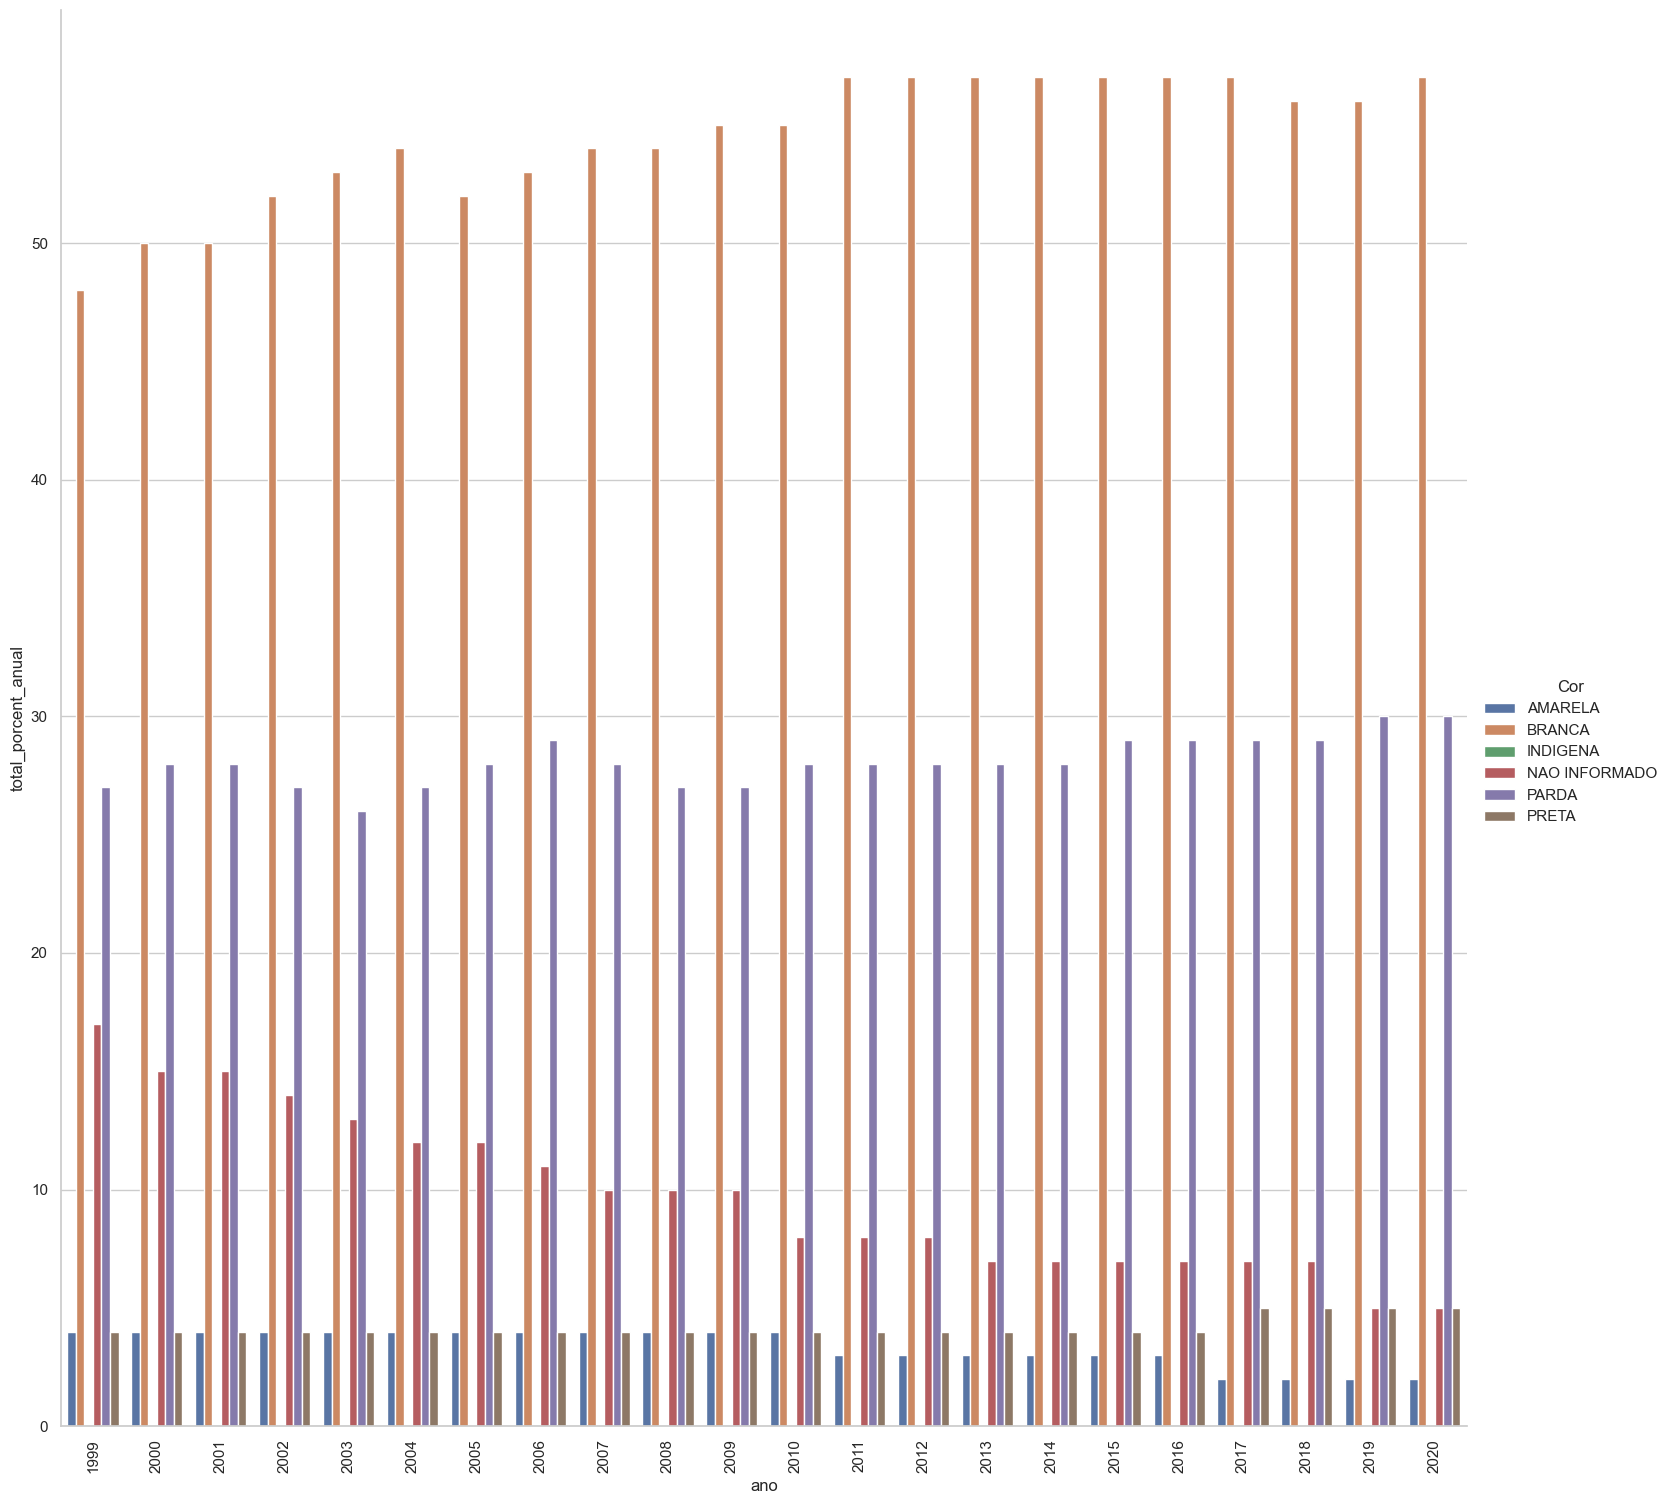

In [194]:
sns.set_theme(style="whitegrid")
g2 = sns.catplot(
    data=df_vinculos, kind="bar",
    x="ano", y="total_porcent_anual", hue="raça",
    alpha=1, height=15
)
plt.xticks(rotation = 90)
g2._legend.set_title('Cor')



##### Analise Final
* Dentro das 2 analises das diferentes bases é possível ver uma conexão entre as médias saláriais dentro do quesito Cor/Raça, tendo uma conexão tambem com a o fato da maioria dos cargos serem ocupados por Brancos, sendo que é algo que é conhecido que brancos ocupam mais cargos de liderança.
* Na relação de Genero há uma diferença salárial, que se coloca como diferença a questão de raça, mulheres negras recebem em média 19% abaixo das médias salariais entre os anos de 1999 e 2020 enquanto mulheres brancas recebem 7,3 % acima da mesma média salarial
* A diferença salarial entre homens negros e homens brancos fica em mais de 36%, o homem branco Recebendo 24 % acima da média e o homem negro recebendo 12 % abaixo das médias saláriais entre os anos de 1999 e 2020

* É notavel a diferença na quantidade de cargos dentro da questão racial, sendo que ouve um aumento declarado de Brancos no Cargos ativos do Executivo Federal, principalmente nos anos de 2010 até 2020
* Há um pequeno aumento na representatividade de pretos e pardos entre os anos e 2016 e 2020, sendo que os pardos tem um fator de oscilação entre toda a série historica

* Mulheres ocupam 44,3% dos cargos no executivo federal ativo porem em média 5,9 % a menos que a média salárial